In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision.transforms import InterpolationMode
from torchvision import models, datasets, transforms
from torch.autograd.functional import jacobian
import math
from utils import *

In [143]:
def C(i):
    if i == 0:
        return 1/(2*math.sqrt(2))
    else:
        return 1/2
def getDCTCoef(size = (8,8)):
    DCT_coef = torch.zeros(size).double()
    for i in range(size[0]):
        for k in range(size[1]):
            C_i = C(i)
            DCT_coef[i,k]=C_i*math.cos((2*k+1)*i*math.pi/16)
    return DCT_coef
DCT_coef = getDCTCoef((8,8))

In [144]:
IDCT_coef = torch.inverse(DCT_coef)

In [88]:
resize8 = transforms.Resize((8, 8))
def process(blocks):
    return resize8(blocks[None,None,:])

In [89]:
blocks = torch.ones([17,17]).double()
t1 = jacobian(process, blocks)[0,0]
t1.shape

torch.Size([8, 8, 17, 17])

In [90]:
torch.sum(torch.abs(t1))

tensor(64., dtype=torch.float64)

In [76]:
t1[:,:,1,1]

tensor([[0.0156, 0.0781, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0781, 0.3906, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)

In [77]:
t1[:,:,3,2]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2344, 0.2344, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0469, 0.0469, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)

In [21]:
blocks = torch.ones([8,8]).double()
def IDCT(blocks):
    return IDCT_coef@(blocks[None,None,:])@IDCT_coef.transpose(1,0)

In [61]:
radblocks = torch.tensor(np.random.rand(8,8)).double()

In [35]:
DCTjacobianrad = jacobian(IDCT, radblocks)[0,0]

In [26]:
DCTjacobian = jacobian(IDCT, blocks)[0,0]

In [27]:
DCTjacobian.shape

torch.Size([8, 8, 8, 8])

In [36]:
DCTjacobianrad

tensor([[[[ 0.1250,  0.1734,  0.1633,  ...,  0.0982,  0.0676,  0.0345],
          [ 0.1734,  0.2405,  0.2265,  ...,  0.1362,  0.0938,  0.0478],
          [ 0.1633,  0.2265,  0.2134,  ...,  0.1283,  0.0884,  0.0451],
          ...,
          [ 0.0982,  0.1362,  0.1283,  ...,  0.0772,  0.0532,  0.0271],
          [ 0.0676,  0.0938,  0.0884,  ...,  0.0532,  0.0366,  0.0187],
          [ 0.0345,  0.0478,  0.0451,  ...,  0.0271,  0.0187,  0.0095]],

         [[ 0.1250,  0.1470,  0.0676,  ..., -0.1734, -0.1633, -0.0982],
          [ 0.1734,  0.2039,  0.0938,  ..., -0.2405, -0.2265, -0.1362],
          [ 0.1633,  0.1920,  0.0884,  ..., -0.2265, -0.2134, -0.1283],
          ...,
          [ 0.0982,  0.1155,  0.0532,  ..., -0.1362, -0.1283, -0.0772],
          [ 0.0676,  0.0795,  0.0366,  ..., -0.0938, -0.0884, -0.0532],
          [ 0.0345,  0.0406,  0.0187,  ..., -0.0478, -0.0451, -0.0271]],

         [[ 0.1250,  0.0982, -0.0676,  ...,  0.0345,  0.1633,  0.1470],
          [ 0.1734,  0.1362, -

In [28]:
DCTjacobian

tensor([[[[ 0.1250,  0.1734,  0.1633,  ...,  0.0982,  0.0676,  0.0345],
          [ 0.1734,  0.2405,  0.2265,  ...,  0.1362,  0.0938,  0.0478],
          [ 0.1633,  0.2265,  0.2134,  ...,  0.1283,  0.0884,  0.0451],
          ...,
          [ 0.0982,  0.1362,  0.1283,  ...,  0.0772,  0.0532,  0.0271],
          [ 0.0676,  0.0938,  0.0884,  ...,  0.0532,  0.0366,  0.0187],
          [ 0.0345,  0.0478,  0.0451,  ...,  0.0271,  0.0187,  0.0095]],

         [[ 0.1250,  0.1470,  0.0676,  ..., -0.1734, -0.1633, -0.0982],
          [ 0.1734,  0.2039,  0.0938,  ..., -0.2405, -0.2265, -0.1362],
          [ 0.1633,  0.1920,  0.0884,  ..., -0.2265, -0.2134, -0.1283],
          ...,
          [ 0.0982,  0.1155,  0.0532,  ..., -0.1362, -0.1283, -0.0772],
          [ 0.0676,  0.0795,  0.0366,  ..., -0.0938, -0.0884, -0.0532],
          [ 0.0345,  0.0406,  0.0187,  ..., -0.0478, -0.0451, -0.0271]],

         [[ 0.1250,  0.0982, -0.0676,  ...,  0.0345,  0.1633,  0.1470],
          [ 0.1734,  0.1362, -

In [20]:
t1.shape

torch.Size([1, 1, 8, 8, 9, 9])

In [17]:
a = square_to_zigzag(torch.abs((DCTjacobian[0,0]@blocks)[:,:,1,2]))

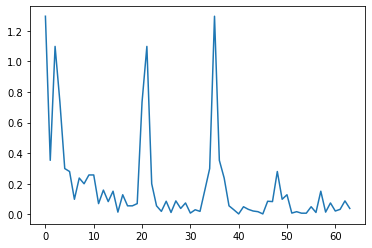

In [18]:
plt.plot(a.cpu().numpy())

In [29]:
DCTjacobian[0,0].shape

torch.Size([8, 8, 8, 8])

In [103]:
resize224 = transforms.Resize((224,224))

In [107]:
import torch.autograd
x = torch.tensor(np.random.rand(1,1,500,500))
x.requires_grad = True
y = resize224(x)
y.backward(gradient=torch.tensor(np.random.rand(1,1,224,224))/2)
x.grad.shape

torch.Size([1, 1, 500, 500])

In [108]:
block_dct,block_idct,square_to_zigzag,quantizationTable

<function utils.block_dct(blocks: torch.Tensor) -> torch.Tensor>

In [133]:
img = torch.ones(1,14,14)

In [147]:
img.shape

torch.Size([1, 14, 14])

In [134]:
imgAddAxis = img[None,:]
img_shape = img.shape[-2:]
DCTBlock = block_dct(blockify(imgAddAxis, 8))
DCTBlock.requires_grad = True
RecoverImg = deblockify(block_idct(DCTBlock), (img_shape[0], img_shape[1]))
RecoverSizeImg = resize224(RecoverImg)
RecoverSizeImg.backward(gradient=torch.tensor(np.zeros([1,8,8,8])))
DCTBlock.grad

RuntimeError: Mismatch in shape: grad_output[0] has a shape of torch.Size([1, 8, 8, 8]) and output[0] has a shape of torch.Size([1, 1, 224, 224]).

In [170]:
radblocks = torch.tensor(np.random.rand(14,14)).double()

In [171]:
resize8 = transforms.Resize((8, 8))
def process(DCTblocks):
    blockSize = DCTblocks.shape
    DCT_coef = getDCTCoef(blockSize)
    IDCT_coef = torch.inverse(DCT_coef)
    blocks = IDCT_coef@DCTblocks@(IDCT_coef.transpose(1,0))
    resizeBlock = resize8(blocks[None,None,:])
    DCT_coef8 = getDCTCoef((8,8))
    return DCT_coef8@resizeBlock[0,0]@(DCT_coef8.transpose(1,0))

In [172]:
J = jacobian(process,radblocks)
J.shape

torch.Size([8, 8, 14, 14])

In [173]:
J

tensor([[[[ 2.9630e-01,  3.4016e-02,  3.0290e-03,  ...,  4.5617e+12,
           -1.4858e+13, -2.5931e+13],
          [ 3.4016e-02,  3.9051e-03,  3.4773e-04,  ...,  5.2370e+11,
           -1.7058e+12, -2.9770e+12],
          [ 3.0290e-03,  3.4773e-04,  3.0964e-05,  ...,  4.6633e+10,
           -1.5189e+11, -2.6509e+11],
          ...,
          [ 4.5617e+12,  5.2370e+11,  4.6633e+10,  ...,  7.0232e+25,
           -2.2876e+26, -3.9923e+26],
          [-1.4858e+13, -1.7058e+12, -1.5189e+11,  ..., -2.2876e+26,
            7.4511e+26,  1.3004e+27],
          [-2.5931e+13, -2.9770e+12, -2.6509e+11,  ..., -3.9923e+26,
            1.3004e+27,  2.2695e+27]],

         [[ 2.0905e-01,  1.5112e-01, -6.0214e-02,  ...,  1.2598e+14,
           -7.9958e+13, -1.2373e+14],
          [ 2.4000e-02,  1.7349e-02, -6.9128e-03,  ...,  1.4463e+13,
           -9.1795e+12, -1.4205e+13],
          [ 2.1371e-03,  1.5448e-03, -6.1556e-04,  ...,  1.2879e+12,
           -8.1739e+11, -1.2649e+12],
          ...,
     